# What Is Machine Learning?

## Categories of Machine Learning

At the most fundamental level, machine learning can be categorized into two main types: **supervised learning** and **unsupervised learning**.

**Supervised learning** involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.
This is further subdivided into **classification** tasks and **regression** tasks: 
- in classification, the labels are discrete categories(categorical)
- while in regression, the labels are continuous quantities (numerical)
We will see examples of both types of supervised learning in the following section.

**Unsupervised learning** involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself."
These models include tasks such as **clustering** and **dimensionality reduction.**
- Clustering algorithms identify distinct groups of data(category)
- while dimensionality reduction algorithms search for more succinct representations of the data.(numerical)

We will see examples of both types of unsupervised learning in the following section.

In addition, there are so-called **semi-supervised learning** methods, which falls somewhere between supervised learning and unsupervised learning.
Semi-supervised learning methods are often useful when only incomplete labels are available.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris
# sepal_length ~ petal_width : features / species : label

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()
# 이건 Classification ( 왜냐면 categorical이기 때문 )

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

- Classification : target is categorical data
- Regression : target is Numerical data

![](figures/06.01-samples-features.png)

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

With this target array in mind, we can use Seaborn to conveniently visualize the data:

C:\Users\82108\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


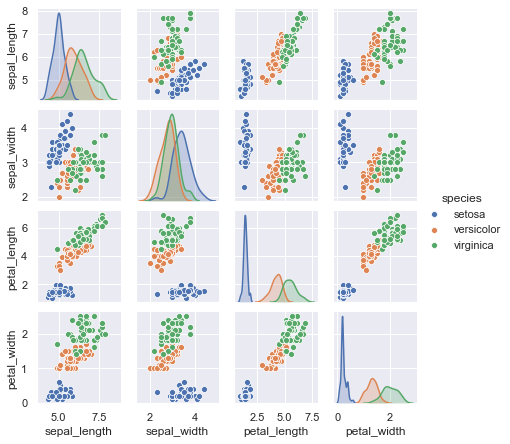

In [7]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);
# 세로가 petal_width인 것의 sepal_length, sepal_width는 구분 쉬움(1이상)

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations:

In [8]:
#extract the features only
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [9]:
#extract the label only
y_iris = iris['species']
y_iris.shape

(150,)

In [10]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In short, the features (X) can be represented in a matrix. Meanwhile, the target (y) (or, label) can be represented in a vector. 
- When a label is a **continuous (numerical)** data type, **Regression** task is used. 
- When the label is a **categorical** data type, **Classification** task is used. 
- When there exist **no Target**, we use **unsupervised learning** methods to solve the problems. 

![](figures/06.01-samples-features.png)

![](figures/06.01-sample-features-wo-labels.PNG)

### Classification: Predicting discrete labels

We will first take a look at a simple *classification* task, in which you are given a set of labeled points.

Imagine that we have the data shown in this figure:

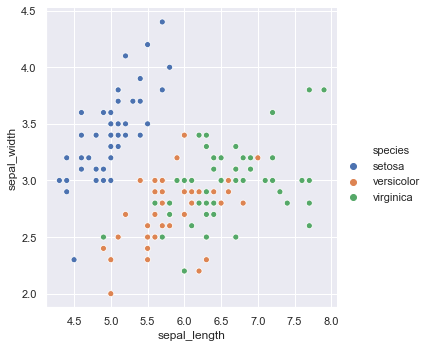

In [18]:
sns.relplot(x="sepal_length", y="sepal_width", hue="species", data=iris)
# replot : 산점도와 선그래프 모두 그릴 수 있는 그래프

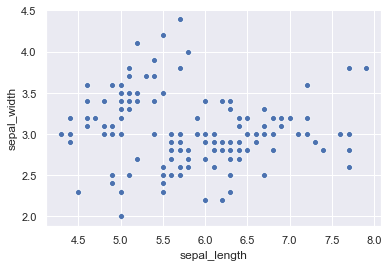

In [19]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris)

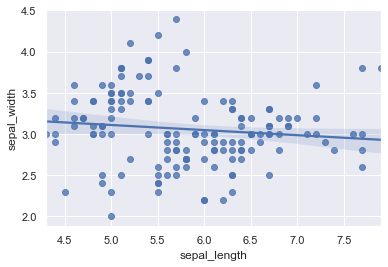

In [28]:
sns.regplot(x = iris[ "sepal_length" ], y = iris[ "sepal_width" ]) 

선과 멀리 떨어져 있으면 다른 꽃일 가능성이 있다

This is the basic idea of a classification task in machine learning, where "classification" indicates that the data has discrete class labels.
At first glance this may look fairly trivial: it would be relatively easy to simply look at this data and draw such a discriminatory line to accomplish this classification.
A benefit of the machine learning approach, however, is that it can generalize to much larger datasets in many more dimensions.

For example, this is similar to the task of automated iris flower detection; in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ sepal_length, sepal_width, petal_length, petal_width 
- *label* $\to$ "iris setosa", "iris versicolor" or "iris virginica"


Let's see other data for an example of classification task. In this example, let's use titanic dataset.

In [21]:
titanic = sns.load_dataset('titanic')
titanic.head()
# Classification : classified by "survived"

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


For example, this is the task to classify the survivor of Titanic passengers based on the profiles; in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ pclass, sex, age, fare, class, embarked 
- *label* $\to$ "survived" or "not survived"

- If the label contains two options, we call it *binary classification*.
- If the label contains more than two options, we call it *multi-class classification*.

### Regression: Predicting continuous labels

In contrast with the discrete labels of a classification algorithm, we will next look at a simple *regression* task in which the labels are continuous values.

For this example, let's use the data tips.

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


For example, this is the task to regress the tip based on the customer profiles; in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ total_bill, sex, smoker, day, time, size (feature 2 : categorical)
- *label* $\to$ "the amount of tip"(total_bill : numerical)

In [23]:
mpg = sns.load_dataset('mpg')
mpg.head()
# mpg : miles per gallen

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


For example, this is the task to regress the mpg (miles per gallon) based on the car profiles; in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ cylinders, displacement, horsepower, weight, acceleration, model_year, origin 
- *label* $\to$ "mpg" 

### Clustering: Inferring labels on unlabeled data

The classification and regression illustrations we just looked at are examples of supervised learning algorithms, in which we are trying to build a model that will predict labels for new data.
Unsupervised learning involves models that describe data without reference to any known labels.

One common case of unsupervised learning is "clustering," in which data is automatically assigned to some number of discrete groups.
For example, we might have some two-dimensional data like that shown in the following figure:

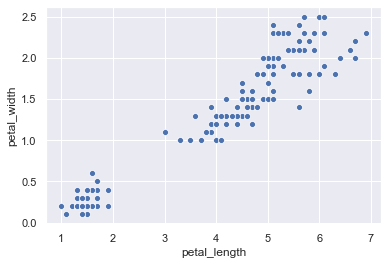

In [24]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris)

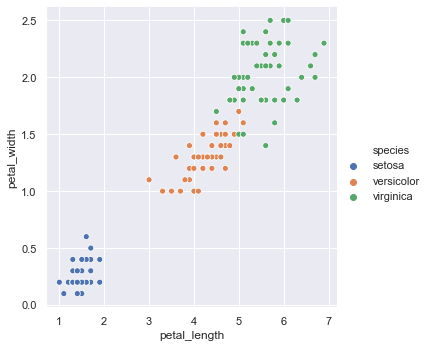

In [27]:
#looking the visualization with the label
sns.relplot(x="petal_length", y="petal_width", hue="species", data=iris)

위 그래프 설명 예시 : setosa를 구분하기 위해서는 petal_width가 1인 지점을 기준으로 구분할 수 있다 - 이렇게 적어야함

*k*-means fits a model consisting of *k* cluster centers; the optimal centers are assumed to be those that minimize the distance of each point from its assigned center.
Again, this might seem like a trivial exercise in two dimensions, but as our data becomes larger and more complex, such clustering algorithms can be employed to extract useful information from the dataset.

We will discuss the *k*-means algorithm in more depth in the later chapter. 

### Dimensionality reduction: Inferring structure of unlabeled data

Dimensionality reduction is another example of an unsupervised algorithm, in which labels or other information are inferred from the structure of the dataset itself.
Dimensionality reduction is a bit more abstract than the examples we looked at before, but generally it seeks to pull out some low-dimensional representation of data that in some way preserves relevant qualities of the full dataset.
Different dimensionality reduction routines measure these relevant qualities in different ways..


![](figures/06.01-sample-features-dimension-reduction.PNG)

We will discuss the popular Principle Component Analysis (PCA) for dimensionality reduction in more depth in the later chapter.

# Association Rule

Association Rule is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

![](figures/06.01-association_rule-features.png)

We can use Association Rules in any dataset where features take only two values i.e., 0/1. Some examples are listed below:

- Market Basket Analysis is a popular application of Association Rules.

- People who visit webpage X are likely to visit webpage Y

- People who have age-group [30,40] & income [>$100k] are likely to own home

An example of Market Basket Analysis is as follows.

![](figures/06.01-association_rule.png)

The representation of above dataset would be as follows:

![](figures/06.01-association_rule_representation.png)

Association Rule Mining is one of the ways to find patterns in data. It finds:
 
 - features (dimensions) which occur together
 
 - features (dimensions) which are “correlated”
 
 
The measures of effectiveness of the rule are as follows:
- Support
- Confidence
- Lift
- Others: Affinity, Leverage

## Summary

Here we have seen a few simple examples of some of the basic types of machine learning approaches.
Needless to say, there are a number of important practical details that we have glossed over, but I hope this section was enough to give you a basic idea of what types of problems machine learning approaches can solve.

In short, we saw the following:

- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Classification*: Models that predict labels as two or more discrete categories
  - *Regression*: Models that predict continuous labels
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data
  

- *Association Rule*: Models that identify patterns of market basket. It can be extended to *Sequential pattern*
    
In the following sections we will go into much greater depth within these categories, and see some more interesting examples of where these concepts can be useful.
